## **CNN Architecture**

**1 Implement a basic convolution operation using a filter and a 5x5 image (matrix)**

In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [1]:
import numpy as np

# Define a 5x5 image matrix
image = np.array([
    [1, 2, 3, 0, 1],
    [4, 5, 6, 1, 2],
    [7, 8, 9, 2, 3],
    [0, 1, 2, 3, 4],
    [5, 6, 7, 4, 5]
])

In [3]:
# Define a 3x3 filter (kernel)
filter = np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
])


In [4]:
# Output size after convolution with valid padding
output_height = image.shape[0] - filter.shape[0] + 1
output_width = image.shape[1] - filter.shape[1] + 1

In [5]:
# Initialize the output matrix
output = np.zeros((output_height, output_width))

# Perform convolution operation
for i in range(output_height):
    for j in range(output_width):
        # Extract the current 3x3 patch from the image
        patch = image[i:i+filter.shape[0], j:j+filter.shape[1]]

        # Perform element-wise multiplication and sum the result
        output[i, j] = np.sum(patch * filter)

# Display the result
print("Output after convolution:")
print(output)

Output after convolution:
[[-6. 12. 12.]
 [-6.  8.  8.]
 [-6.  6.  6.]]


In [9]:
## Define cnn model

model = models.Sequential()

## # Add the first convolutional layer with 32 filters, a 3x3 kernel, and ReLU activation

model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))

## Add a max pooling layer with a 2x2 pool size

model.add(layers.MaxPooling2D((2,2)))


## add second convolutional layer with filters, a 3*3 kernal , and Relu activation

model.add(layers.Conv2D(64,(3,3),activation='relu'))

## Add another max pooling layer
model.add(layers.MaxPooling2D(2,2))

# Flatten the 3D outputs to 1D for the fully connected layers
model.add(layers.Flatten())

# Add a fully connected (dense) layer with 64 units and ReLU activation
model.add(layers.Dense(64,activation='relu'))

# Add the output layer with 10 units (for 10 classes) and softmax activation
model.add(layers.Dense(10,activation='softmax'))

# Compile the model with a loss function and an optimizer

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



## model summary

model.summary()




/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

**2. Implement max pooling on a 4x4 feature map with a 2x2 window**

In [11]:

def max_pooling_2x2(feature_map):
    # Feature map size: 4x4, Pooling window: 2x2, stride: 2
    output_size = feature_map.shape[0] // 2  # Output will be 2x2

    pooled_map = np.zeros((output_size, output_size))  # Initialize output map

    # Iterate over the 2x2 blocks in the feature map
    for i in range(0, feature_map.shape[0], 2):
        for j in range(0, feature_map.shape[1], 2):
            # Extract the 2x2 block
            block = feature_map[i:i+2, j:j+2]
            # Find the maximum value in the block
            pooled_map[i//2, j//2] = np.max(block)
            return pooled_map


In [12]:
# Define the 4x4 feature map
feature_map = np.array([[1, 3, 2, 4],
                        [5, 6, 7, 8],
                        [9, 10, 11, 12],
                        [13, 14, 15, 16]])

# Apply max pooling
pooled_feature_map = max_pooling_2x2(feature_map)

# Print the result
print("Pooled Feature Map:")
print(pooled_feature_map)

Pooled Feature Map:
[[6. 0.]
 [0. 0.]]


**3. Implement the ReLU activation function on a feature map**

In [13]:
def relu_activation(feature_map):
    # Apply ReLU activation to each element in the feature map
    return np.maximum(0, feature_map)



# Define a sample feature map
feature_map = np.array([[ 1, -2,  3],
                        [-4,  5, -6],
                        [ 7, -8,  9]])

In [14]:
# Apply ReLU activation
activated_feature_map = relu_activation(feature_map)

# Print the results
print("Original Feature Map:")
print(feature_map)
print("\nFeature Map After ReLU Activation:")
print(activated_feature_map)


Original Feature Map:
[[ 1 -2  3]
 [-4  5 -6]
 [ 7 -8  9]]

Feature Map After ReLU Activation:
[[1 0 3]
 [0 5 0]
 [7 0 9]]


**4.  Create a simple CNN model with one convolutional layer and a fully connected layer, using random data**

In [17]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense
import numpy as np

# Generate random data
input_shape = (100, 28, 28, 1)  # 100 samples of 28x28 grayscale images
num_classes = 10  # Example: 10-class classification
X = np.random.rand(*input_shape).astype(np.float32)  # Random input data
y = np.random.randint(0, num_classes, size=(100,))  # Random labels

# One-hot encode the labels
y = tf.keras.utils.to_categorical(y, num_classes)

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # Convolutional layer
    Flatten(),  # Flatten the output
    Dense(128, activation='relu'),  # Fully connected layer
    Dense(num_classes, activation='softmax')  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Train the model
model.fit(X, y, epochs=5, batch_size=16, verbose=1)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 21632)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │       2,769,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,770,634 (10.57 MB)

 Trainable params: 2,770,634 (10.57 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.0866 - loss: 2.7934
Epoch 2/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.1622 - loss: 2.3389
Epoch 3/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.3918 - loss: 2.0439
Epoch 4/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.7237 - loss: 1.6376
Epoch 5/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.8770 - loss: 1.2451


**5. Generate a synthetic dataset using random noise and train a simple CNN model on it**

In [20]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D
import numpy as np

# Generate synthetic dataset
num_samples = 1000
img_height, img_width, channels = 28, 28, 1
num_classes = 10

# Generate random noise images as input data
X = np.random.rand(num_samples, img_height, img_width, channels).astype(np.float32)

# Generate random labels
y = np.random.randint(0, num_classes, size=(num_samples,))
y = tf.keras.utils.to_categorical(y, num_classes)  # One-hot encode labels

# Split the data into training and testing sets
X_train, X_test = X[:800], X[800:]
y_train, y_test = y[:800], y[800:]

# Define a simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, channels)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")



Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │         692,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.1064 - loss: 2.3575 - val_accuracy: 0.0900 - val_loss: 2.3181
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.1319 - loss: 2.2919 - val_accuracy: 0.1050 - val_loss: 2.3003
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.2600 - loss: 2.2506 - val_accuracy: 0.0950 - val_loss: 2.2975
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.3810 - loss: 2.1796 - val_accuracy: 0.0900 - val_loss: 2.3475
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.2524 - loss: 2.0826 - val_accuracy: 0.0750 - val_loss: 2.3376
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.6174 - loss: 1.9270 - val_accuracy: 0.0800 - val_loss: 2.3551
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.6964 - loss: 1.7212 - val_accuracy: 0.0950 - val_loss: 2.4364
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.7513 - loss: 1.5043 - val_accuracy: 0.1000 - v

**6. Create a simple CNN using Keras with one convolution layer and a max-pooling layer**

In [24]:
input_shape = (28,28,1)

model = Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    MaxPooling2D((2,2),name = 'MaxPooling'),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ MaxPooling (MaxPooling2D)            │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_10 (Flatten)                 │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 128)                 │         692,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

**7. Write a code to add a fully connected layer after the convolution and max-pooling layers in a CNN**

In [25]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, name="Conv_Layer"),
    MaxPooling2D(pool_size=(2, 2), name="MaxPooling_Layer"),
    Flatten(name="Flatten_Layer"),
    Dense(128, activation='relu', name="FullyConnected_Layer1"),  # First fully connected layer
    Dense(10, activation='softmax', name="Output_Layer")  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Conv_Layer (Conv2D)                  │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ MaxPooling_Layer (MaxPooling2D)      │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Flatten_Layer (Flatten)              │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ FullyConnected_Layer1 (Dense)        │ (None, 128)                 │         692,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output_Layer (Dense)                 │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
# Example: Training with dummy data
import numpy as np

# Generate random data (dummy dataset)
X_train = np.random.rand(100, 28, 28, 1)  # 100 samples of random images
y_train = tf.keras.utils.to_categorical(np.random.randint(0, 10, size=(100,)), 10)

# Train the model
model.fit(X_train, y_train, epochs=25, batch_size=10)



Epoch 1/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0935 - loss: 2.3921
Epoch 2/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1655 - loss: 2.2500
Epoch 3/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2167 - loss: 2.1655
Epoch 4/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5791 - loss: 2.0311
Epoch 5/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5123 - loss: 1.9145
Epoch 6/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5843 - loss: 1.7218
Epoch 7/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7601 - loss: 1.5426
Epoch 8/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9315 - loss: 1.3192
Epoch 9/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9471 - loss: 1.0916
Epoch 10/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9738 - loss: 0.8341
Epoch 11/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 0.6739
Epoch 12/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy:

**8. Write a code to add  batch normalization to a simple CNN model**

In [28]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Activation



# Define the input shape
input_shape = (28, 28, 1)  # Grayscale images of size 28x28

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), input_shape=input_shape, name="Conv_Layer"),
    BatchNormalization(name="BatchNorm_Layer1"),  # Batch Normalization
    Activation('relu', name="ReLU_Activation1"),  # ReLU activation after normalization
    MaxPooling2D(pool_size=(2, 2), name="MaxPooling_Layer"),

    Flatten(name="Flatten_Layer"),
    Dense(128, name="FullyConnected_Layer"),
    BatchNormalization(name="BatchNorm_Layer2"),  # Batch Normalization for Fully Connected Layer
    Activation('relu', name="ReLU_Activation2"),  # ReLU activation after normalization

    Dense(10, activation='softmax', name="Output_Layer")  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Conv_Layer (Conv2D)                  │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ BatchNorm_Layer1                     │ (None, 26, 26, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ ReLU_Activation1 (Activation)        │ (None, 26, 26, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ MaxPooling_Layer (MaxPooling2D)      │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Flatten_Layer (Flatten)              │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ FullyConnected_Layer (Dense)         │ (None, 128)                 │         692,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ BatchNorm_Layer2                     │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ ReLU_Activation2 (Activation)        │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output_Layer (Dense)                 │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 694,602 (2.65 MB)

 Trainable params: 694,282 (2.65 MB)

 Non-trainable params: 320 (1.25 KB)

**9. Write a code to add dropout regularization to a simple CNN mode**

In [29]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the input shape
input_shape = (28, 28, 1)  # Grayscale images of size 28x28

# Build the CNN model with Dropout regularization
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, name="Conv_Layer1"),
    MaxPooling2D(pool_size=(2, 2), name="MaxPooling_Layer1"),
    Dropout(0.25, name="Dropout_Layer1"),  # Dropout after the first pooling layer

    Conv2D(64, (3, 3), activation='relu', name="Conv_Layer2"),
    MaxPooling2D(pool_size=(2, 2), name="MaxPooling_Layer2"),
    Dropout(0.25, name="Dropout_Layer2"),  # Dropout after the second pooling layer

    Flatten(name="Flatten_Layer"),
    Dense(128, activation='relu', name="FullyConnected_Layer"),
    Dropout(0.5, name="Dropout_Layer3"),  # Dropout before the output layer

    Dense(10, activation='softmax', name="Output_Layer")  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Conv_Layer1 (Conv2D)                 │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ MaxPooling_Layer1 (MaxPooling2D)     │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dropout_Layer1 (Dropout)             │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv_Layer2 (Conv2D)                 │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ MaxPooling_Layer2 (MaxPooling2D)     │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dropout_Layer2 (Dropout)             │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Flatten_Layer (Flatten)              │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ FullyConnected_Layer (Dense)         │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dropout_Layer3 (Dropout)             │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output_Layer (Dense)                 │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

**10 Write a code to print the architecture of the VGG16 model in Keras***

In [30]:
from tensorflow.keras.applications import VGG16

# Load the pre-trained VGG16 model
model = VGG16(weights='imagenet', include_top=True)

# Print the architecture of the VGG16 model
model.summary()


553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_16 (InputLayer)          │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
from tensorflow.keras.utils import plot_model

# Load the pre-trained VGG16 model
model = VGG16(weights='imagenet', include_top=True)

# Save the visualization as an image
plot_model(model, to_file='vgg16_architecture.png', show_shapes=True, show_layer_names=True)

print("Model visualization saved as 'vgg16_architecture.png'.")

Model visualization saved as 'vgg16_architecture.png'.


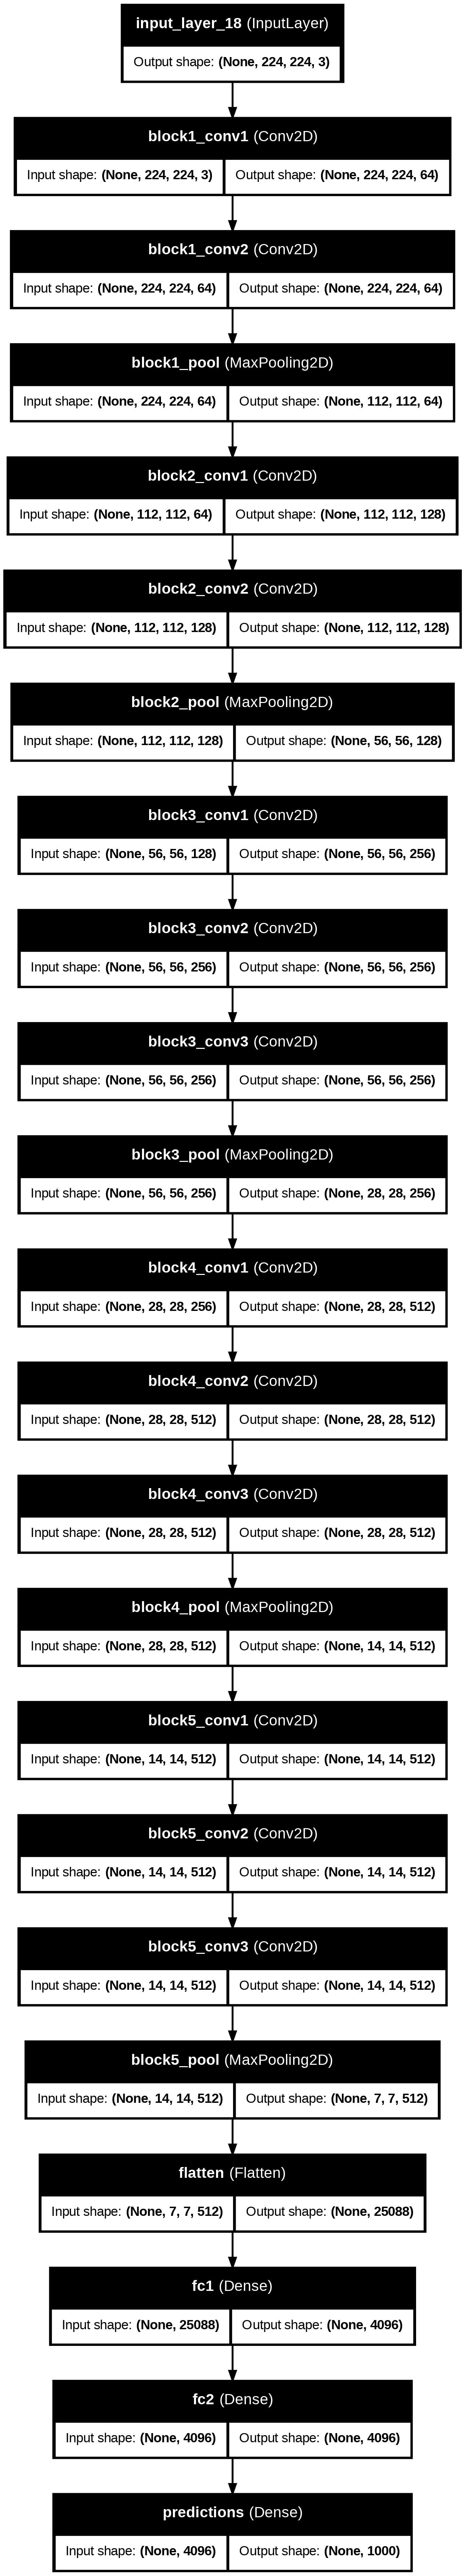

In [32]:
from IPython.display import Image
from tensorflow.keras.applications import VGG16
from tensorflow.keras.utils import plot_model

# Load the pre-trained VGG16 model
model = VGG16(weights='imagenet', include_top=True)

# Save the visualization as an image
plot_model(model, to_file='vgg16_architecture.png', show_shapes=True, show_layer_names=True)

# Display the image
Image('vgg16_architecture.png')


**11 Write a code to plot the accuracy and loss graphs after training a CNN model**

In [33]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Create a simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=32)

# Plot accuracy and loss graphs
def plot_history(history):
    # Plot training & validation accuracy
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot training & validation loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Call the function to plot graphs
plot_history(history)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 25ms/step - accuracy: 0.9117 - loss: 0.3004 - val_accuracy: 0.9797 - val_loss: 0.0621
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 24ms/step - accuracy: 0.9850 - loss: 0.0501 - val_accuracy: 0.9856 - val_loss: 0.0421
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 24ms/step - accuracy: 0.9909 - loss: 0.0308 - val_accuracy: 0.9865 - val_loss: 0.0419
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 25ms/step - accuracy: 0.9943 - loss: 0.0190 - val_accuracy: 0.9879 - val_loss: 0.0401
Epoch 5/10
 402/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 23ms/step - accuracy: 0.9954 - loss: 0.0149

KeyboardInterrupt: 

**12. Write a code to print the architecture of the ResNet50 model in Keras**

**13.  Write a code to train a basic CNN model and print the training loss and accuracy after each epoch?**

In [35]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50

# Load the ResNet50 model with pre-trained weights
model = ResNet50(weights='imagenet')

# Print the model architecture summary
model.summary()


102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_21            │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer_21[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 25,636,712 (97.80 MB)

 Trainable params: 25,583,592 (97.59 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [34]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import LambdaCallback
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape the data to fit the model's input shape (28x28x1) and normalize
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Create a basic CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Create a callback to print loss and accuracy after each epoch
print_callback = LambdaCallback(
    on_epoch_end=lambda epoch, logs: print(f"Epoch {epoch+1}: Loss = {logs['loss']:.4f}, Accuracy = {logs['accuracy']:.4f}")
)

# Train the model with the custom callback
model.fit(x_train, y_train, epochs=2, batch_size=32, validation_data=(x_test, y_test), callbacks=[print_callback])


Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9094 - loss: 0.3038Epoch 1: Loss = 0.1539, Accuracy = 0.9544
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 25ms/step - accuracy: 0.9094 - loss: 0.3037 - val_accuracy: 0.9803 - val_loss: 0.0610
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9833 - loss: 0.0541Epoch 2: Loss = 0.0524, Accuracy = 0.9838
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 45s 24ms/step - accuracy: 0.9833 - loss: 0.0541 - val_accuracy: 0.9857 - val_loss: 0.0439
